Modify the scratch code of gaussian mixture clustering in our lecture:

- Modify so it performs early stopping when the log likelihood does not improve anymore. Note that if you log the normal distribution, you will get negative sign. Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
- Perform plotting every 5 iterations on the resulting clusters

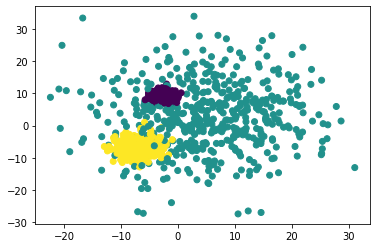

In [6]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import random

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 10, 2], random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)


NLL smaller?  -40874.05393034698
NLL difference:  40874.05393034698
NLL smaller?  -92404.18558631539
NLL difference:  32727.781313762775
NLL smaller?  -215216.5844449917
NLL difference:  1734.1447521699592
NLL smaller?  -216309.58722670196
NLL difference:  22.751796984637622
Final NLL:  -216309.58722670196
final difference:  22.751796984637622


Text(0.5, 1.0, 'Final iteration :15')

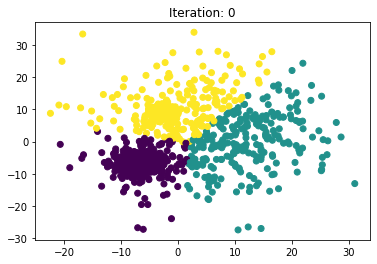

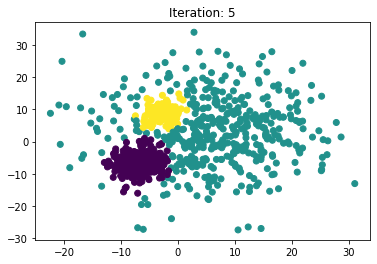

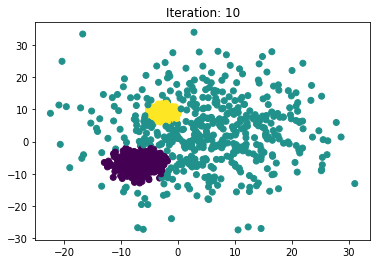

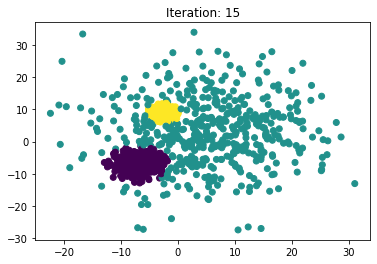

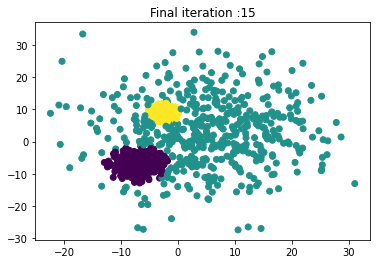

In [8]:
#define basic params
m, n = X.shape
K = 3
max_iter = 20
oldNLL = 0
NLL_Tolerance = 50

#==initialization==

init_prob = 1/K

#responsibliity
r = np.full(shape=(m, K), fill_value= init_prob)

#pi
pi = np.full((K, ), fill_value= init_prob) #simply use 1/k for pi

#mean
random_row = random.sample(range(m),K)
mean = X[random_row,:].T #.T to make to shape (M, K)

#covariance
cov = np.full(shape=(K,2,2), fill_value= np.cov(X.T))

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i]) #normalisation

    NLL = 0
    
    for i in range(m):
        for k in range(K):
            NLL += np.log(pi[k])
            NLL += multivariate_normal.logpdf(X[i], mean=mean[:, k], cov=cov[k])
    
    #every 5 iteration plot once
    if(iteration % 5 == 0):
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
        print("NLL smaller? ", NLL)
        
        NLL_diff = np.abs(NLL - oldNLL)
        print("NLL difference: ", NLL_diff)
    
    
    
    
    if(NLL_diff < NLL_Tolerance):
        print("Final NLL: ", NLL)
        print("final difference: ", NLL_diff)
        break
        
    oldNLL = NLL
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    
    #PI
    pi = NK / m
    
    #mean
    mean =  ( X.T @ r ) / NK
    
    #covariance (also called Sigma)
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]

        

#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title(f"Final iteration :{iteration}")
#f"Iteration: {iteration}"